<a href="https://colab.research.google.com/github/kshitija2692/nlp-respiratory-sentiment-analysis/blob/main/flikpkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud  import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
data = pd.read_csv("/flipkart.csv")
print(data.head())

   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [10]:
print(data.isnull().sum())

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64


In [11]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["Review"] = data["Review"].apply(clean)

<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2823406581.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/tmp/ipython-input-2823406581.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/tmp/ipython-input-2823406581.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,values = quantity,names = numbers,hole=0.5)
figure.show()

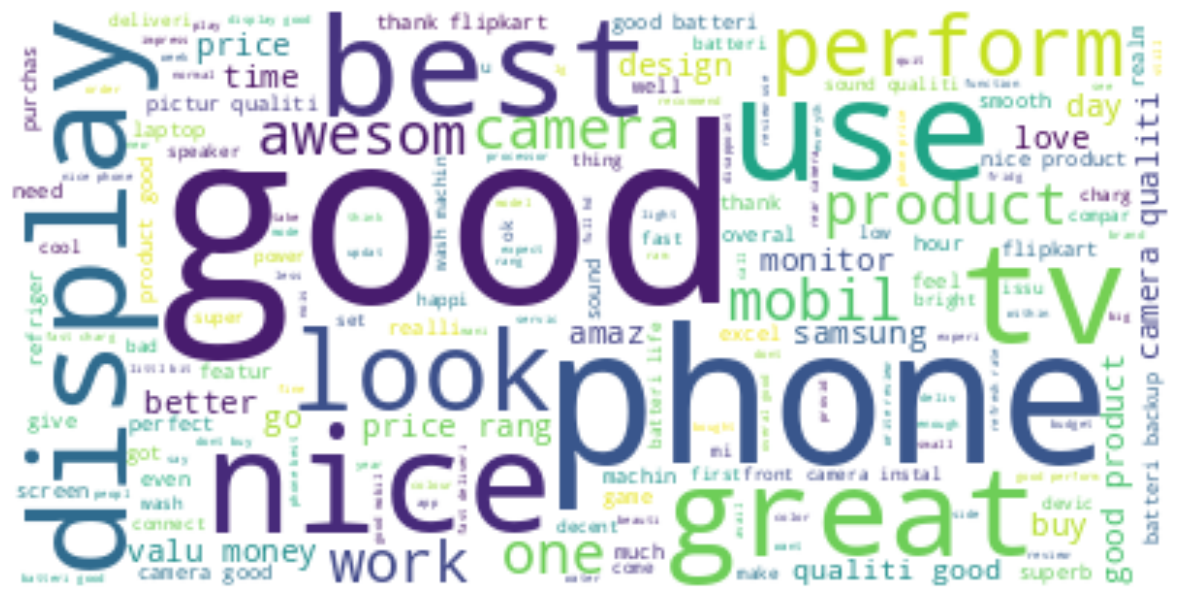

In [13]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.553
Negative:  96.775
Neutral:  1283.688


1. Review-level Sentiment Classification (USING COMPOUND SCORE)

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Get compound score for each review
data["Compound"] = data["Review"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

# Classify sentiment
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment_Label"] = data["Compound"].apply(label_sentiment)

data.head()


,Review,Positive,Negative,Neutral,Compound,Sentiment_Label
0,best great performancei got around backup bi...,0.395,0.101,0.504,0.9325,Positive
1,good perfom,0.744,0.000,0.256,0.4404,Positive
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723,0.7579,Positive
3,wife happi best product 👌🏻😘,0.512,0.000,0.488,0.6369,Positive
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000,0.0000,Neutral


2. Sentiment Distribution Visualization (BAR CHART)

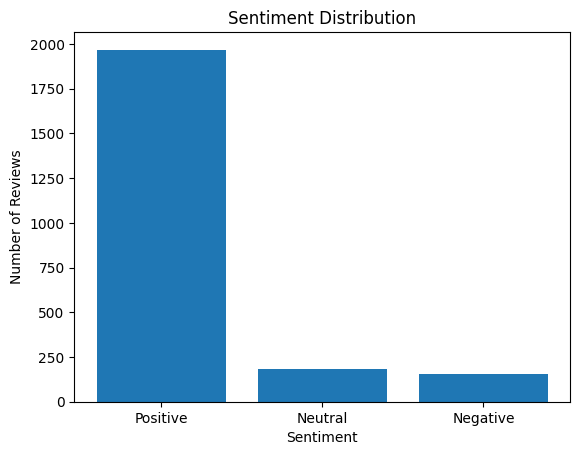

In [18]:
import matplotlib.pyplot as plt

sentiment_counts = data["Sentiment_Label"].value_counts()

plt.figure()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


3. Positive vs Negative WordClouds

Positive reviews WordCloud

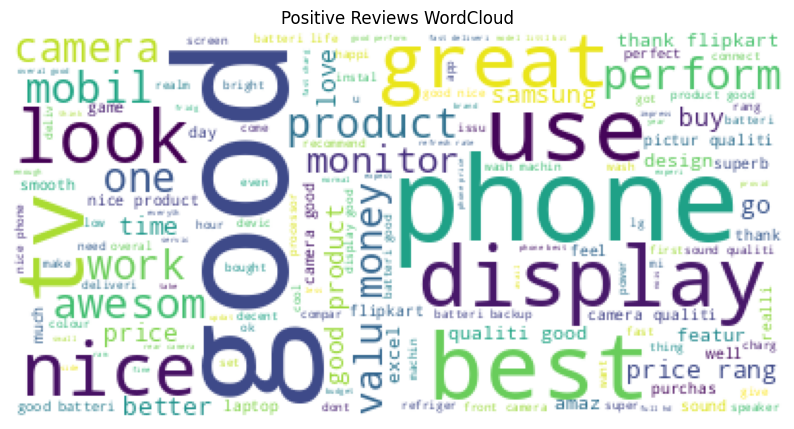

In [19]:
positive_text = " ".join(
    data[data["Sentiment_Label"] == "Positive"]["Review"]
)

wordcloud_pos = WordCloud(
    background_color="white",
    stopwords=STOPWORDS
).generate(positive_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()


Negative reviews WordCloud

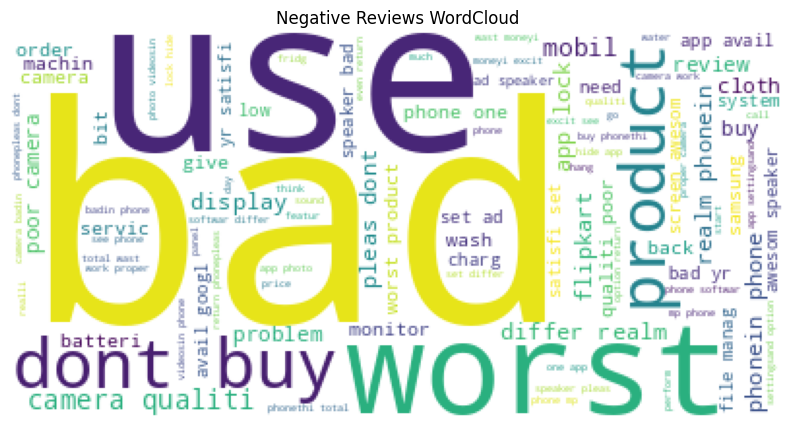

In [20]:
negative_text = " ".join(
    data[data["Sentiment_Label"] == "Negative"]["Review"]
)

wordcloud_neg = WordCloud(
    background_color="white",
    stopwords=STOPWORDS
).generate(negative_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()


4. Aspect-Based Sentiment Analysis (HIGH VALUE ⭐)

Define aspects & keywords

In [21]:
aspects = {
    "Price": ["price", "cost", "expensive", "cheap"],
    "Delivery": ["delivery", "late", "delay", "shipping"],
    "Quality": ["quality", "bad", "good", "excellent"],
    "Service": ["service", "support", "customer"]
}


Calculate aspect sentiment

In [22]:
def aspect_sentiment(review, keywords):
    score = 0
    for word in keywords:
        if word in review:
            score += sia.polarity_scores(review)["compound"]
    return score

for aspect, words in aspects.items():
    data[aspect + "_Score"] = data["Review"].apply(
        lambda x: aspect_sentiment(x, words)
    )

data[["Review", "Price_Score", "Delivery_Score", "Quality_Score", "Service_Score"]].head()


,Review,Price_Score,Delivery_Score,Quality_Score,Service_Score
0,best great performancei got around backup bi...,0.9325,0.9325,0.9325,0.0
1,good perfom,0.0000,0.0000,0.4404,0.0
2,great perform usual also game laptop issu batt...,0.0000,0.0000,0.0000,0.0
3,wife happi best product 👌🏻😘,0.0000,0.0000,0.0000,0.0
4,light weight laptop new amaz featur batteri li...,0.0000,0.0000,0.0000,0.0
